> 说明：Python最好的学习就是实战
# 项目说明
**项目目标：**想知道历史上沪深300单日最低时跌破5%有多少次，并画图展示

**项目步骤：**
1. 从开源API-[opendatatools](https://github.com/PKUJohnson/OpenData)中获取沪深300列表
2. 获取沪深300日度交易信息
3. 整理数据获得沪深300单日最低时跌破5%
4. 可视化

# 从opendatatools中获取沪深300列表

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from opendatatools import stock  #如果没装opendatatools，请使用pip install opendatatools安装
%matplotlib inline

In [40]:
index_list = stock.get_index_list('CSI')

fetching data at page 2
fetching data at page 3
fetching data at page 4
fetching data at page 5
fetching data at page 6
fetching data at page 7
fetching data at page 8
fetching data at page 9
fetching data at page 10
fetching data at page 11
fetching data at page 12
fetching data at page 13
fetching data at page 14
fetching data at page 15
fetching data at page 16
fetching data at page 17
fetching data at page 18
fetching data at page 19
fetching data at page 20
fetching data at page 21
fetching data at page 22
fetching data at page 23
fetching data at page 24
fetching data at page 25
fetching data at page 26
fetching data at page 27
fetching data at page 28
fetching data at page 29
fetching data at page 30


In [111]:
index_list.head(5)

,base_date,base_point,class_assets,class_classify,class_currency,class_eassets,class_eclassify,class_ecurrency,class_ehot,class_eregion,...,index_e_fullname,index_e_intro,index_ename,indx_sname,is_custom,is_show,num,online_date,tclose,yld_1_mon
0,1990-12-19 00:00:00,100.00,股票,综合,人民币,Equity,Composite(Equity),CNY,None,China Mainland,...,SSE Composite Index,SSE Composite Index consists of all listed sto...,SSE Index,上证指数,0,1,1470,1991-07-15,2827.63,-0.70
1,1990-12-19 00:00:00,100.00,股票,综合,人民币,Equity,Composite(Equity),CNY,None,China Mainland,...,SSE A Share Index,SSE A Share Index consists of all listed A sha...,A Share Index,Ａ股指数,0,1,1420,1992-02-21,2961.30,-0.69
2,1992-02-21 00:00:00,100.00,股票,综合,美元,Equity,Composite(Equity),USD,None,China Mainland,...,SSE B Share Index,SSE B Share Index consists of all listed B sha...,B Share Index,Ｂ股指数,0,1,50,1992-08-17,291.90,-1.05
3,1993-04-30 00:00:00,1358.78,股票,行业,人民币,Equity,Sector,CNY,None,China Mainland,...,SSE Industrial Index,This index series categorizes all Shanghai Sto...,Industrial Index,工业指数,0,1,971,1993-05-03,2325.37,-1.24
4,1993-04-30 00:00:00,1358.78,股票,行业,人民币,Equity,Sector,CNY,None,China Mainland,...,SSE Commercial Index,This index series categorizes all Shanghai Sto...,Commercial Index,商业指数,0,1,137,1993-05-03,2667.05,-2.53


In [42]:
HS300 = index_list.loc[index_list['indx_sname'].isin(['沪深300'])] 
HS300

,base_date,base_point,class_assets,class_classify,class_currency,class_eassets,class_eclassify,class_ecurrency,class_ehot,class_eregion,...,index_e_fullname,index_e_intro,index_ename,indx_sname,is_custom,is_show,num,online_date,tclose,yld_1_mon
144,2004-12-31 00:00:00,1000.00,股票,规模,人民币,Equity,Size,CNY,None,China Mainland,...,CSI 300 Index,CSI 300 Index consists of the 300 largest and ...,CSI 300,沪深300,0,1,300,2005-04-08,3467.52,-1.24


In [74]:
HS300_code = HS300['index_code'].values
HS300_code = HS300_code[0] + '.SH'  #沪深300是以SH结尾的补充一下
HS300_code #成功获取了沪深300的code并将信息存入HS300_code之中

'000300.SH'

# 获取沪深300日度交易信息

In [82]:
# 沪深300从2005年4月8日起发布
df, msg = stock.get_daily(HS300_code, start_date='2005-04-08', end_date='2018-07-10')

In [86]:
df.set_index('time',drop=False, inplace=True)
df.head(10)

,change,high,last,low,open,percent,symbol,time,turnover_rate,volume
time,,,,,,,,,,
2005-04-08,18.712,1003.699,1003.445,979.529,984.665,1.90,000300.SH,2005-04-08,0.0,1476252600
2005-04-11,-8.024,1008.735,995.421,992.773,1003.879,-0.80,000300.SH,2005-04-11,0.0,1593606600
2005-04-12,-16.724,993.711,978.697,978.204,993.711,-1.68,000300.SH,2005-04-12,0.0,1022619300
2005-04-13,22.203,1006.499,1000.900,987.950,987.950,2.27,000300.SH,2005-04-13,0.0,1607168700
2005-04-14,-13.925,1006.416,986.975,985.578,1004.640,-1.39,000300.SH,2005-04-14,0.0,1294571000
2005-04-15,-12.893,982.613,974.082,971.930,982.613,-1.31,000300.SH,2005-04-15,0.0,1040895500
2005-04-18,-10.310,970.907,963.772,958.649,970.907,-1.06,000300.SH,2005-04-18,0.0,859840000
2005-04-19,2.114,968.867,965.886,957.910,962.916,0.22,000300.SH,2005-04-19,0.0,921262300
2005-04-20,-15.019,964.151,950.867,946.197,964.151,-1.55,000300.SH,2005-04-20,0.0,885070500


In [90]:
#存一份小一点的数据集hs，只保留需要的变量
hs = df.copy()
hs = hs.iloc[:,:6]
hs['last1'] = hs['last'].shift(1) #last1是前一日的收盘价
hs.head(10)

,change,high,last,low,open,percent,last1
time,,,,,,,
2005-04-08,18.712,1003.699,1003.445,979.529,984.665,1.90,NaN
2005-04-11,-8.024,1008.735,995.421,992.773,1003.879,-0.80,1003.445
2005-04-12,-16.724,993.711,978.697,978.204,993.711,-1.68,995.421
2005-04-13,22.203,1006.499,1000.900,987.950,987.950,2.27,978.697
2005-04-14,-13.925,1006.416,986.975,985.578,1004.640,-1.39,1000.900
2005-04-15,-12.893,982.613,974.082,971.930,982.613,-1.31,986.975
2005-04-18,-10.310,970.907,963.772,958.649,970.907,-1.06,974.082
2005-04-19,2.114,968.867,965.886,957.910,962.916,0.22,963.772
2005-04-20,-15.019,964.151,950.867,946.197,964.151,-1.55,965.886


数据集中没有涨跌幅信息，所以我们利用点位数据计算当日最低值是否跌破了5%，计算公式如下：

每日最低跌幅 = (当日最低价 - 前日收盘价)/前日收盘价*100

In [94]:
hs['low_percet'] = (hs['low'] - hs['last1'])/hs['last1']*100
hs.head(10)

,change,high,last,low,open,percent,last1,low_percet
time,,,,,,,,
2005-04-08,18.712,1003.699,1003.445,979.529,984.665,1.90,NaN,NaN
2005-04-11,-8.024,1008.735,995.421,992.773,1003.879,-0.80,1003.445,-1.063536
2005-04-12,-16.724,993.711,978.697,978.204,993.711,-1.68,995.421,-1.729620
2005-04-13,22.203,1006.499,1000.900,987.950,987.950,2.27,978.697,0.945441
2005-04-14,-13.925,1006.416,986.975,985.578,1004.640,-1.39,1000.900,-1.530822
2005-04-15,-12.893,982.613,974.082,971.930,982.613,-1.31,986.975,-1.524355
2005-04-18,-10.310,970.907,963.772,958.649,970.907,-1.06,974.082,-1.584364
2005-04-19,2.114,968.867,965.886,957.910,962.916,0.22,963.772,-0.608235
2005-04-20,-15.019,964.151,950.867,946.197,964.151,-1.55,965.886,-2.038439


In [96]:
#找到当天最低跌幅跌破5%的样本
hs_low = hs[hs['low_percet']<= -5]
hs_low.head(10)

,change,high,last,low,open,percent,last1,low_percet
time,,,,,,,,
2006-06-07,-78.909,1398.184,1320.233,1319.698,1398.184,-5.64,1399.142,-5.678051
2006-07-13,-73.111,1418.135,1346.088,1344.155,1415.875,-5.15,1419.199,-5.287771
2007-01-31,-166.549,2548.175,2385.335,2367.670,2544.300,-6.53,2551.884,-7.218745
2007-02-27,-250.184,2719.519,2457.492,2454.918,2717.812,-9.24,2707.676,-9.334869
2007-04-19,-154.198,3297.946,3150.303,3065.282,3297.946,-4.67,3304.501,-7.239187
2007-05-30,-281.830,4104.200,3886.459,3849.701,3906.041,-6.76,4168.289,-7.643136
2007-05-31,41.493,3991.730,3927.952,3683.562,3828.916,1.07,3886.459,-5.220613
2007-06-04,-292.523,3822.409,3511.431,3503.939,3804.958,-7.69,3803.954,-7.886925
2007-06-05,123.202,3635.153,3634.633,3246.733,3406.999,3.51,3511.431,-7.538180


In [110]:
print ( '历史上沪深300单日最低时跌破5%的次数:'+ str(len(hs_low))) #2005年4月8日到2018年7月11日
print ( '历史上沪深300单日最低时跌破5%的次数占总交易日比重:'+  str(round(len(hs_low)/len(hs)*100,3)) + '%')

历史上沪深300单日最低时跌破5%的次数:75
历史上沪深300单日最低时跌破5%的次数占总交易日比重:2.326%


In [112]:
#找到当天跌幅跌破5%的样本
hs_low1 = hs[hs['percent']<= -5]
hs_low1.head(10)

,change,high,last,low,open,percent,last1,low_percet
time,,,,,,,,
2006-06-07,-78.909,1398.184,1320.233,1319.698,1398.184,-5.64,1399.142,-5.678051
2006-07-13,-73.111,1418.135,1346.088,1344.155,1415.875,-5.15,1419.199,-5.287771
2007-01-31,-166.549,2548.175,2385.335,2367.670,2544.300,-6.53,2551.884,-7.218745
2007-02-27,-250.184,2719.519,2457.492,2454.918,2717.812,-9.24,2707.676,-9.334869
2007-05-30,-281.830,4104.200,3886.459,3849.701,3906.041,-6.76,4168.289,-7.643136
2007-06-04,-292.523,3822.409,3511.431,3503.939,3804.958,-7.69,3803.954,-7.886925
2007-07-05,-206.147,3706.597,3537.435,3535.042,3688.312,-5.51,3743.582,-5.570601
2008-01-22,-391.866,5032.245,4753.868,4708.388,5015.428,-7.62,5145.734,-8.499196
2008-01-28,-345.546,5038.507,4731.883,4711.277,5038.507,-6.81,5077.429,-7.211366


In [113]:
print ( '历史上沪深300单日收盘时跌破5%的次数:'+ str(len(hs_low1))) #2005年4月8日到2018年7月11日
print ( '历史上沪深300单日收盘时跌破5%的次数占所有跌破5%的比重:'+ str(round(len(hs_low1)/len(hs_low)*100,3)) + '%')

历史上沪深300单日收盘时跌破5%的次数:45
历史上沪深300单日收盘时跌破5%的次数占所有跌破5%的比重:60.0%


# 可视化
## 年度分布情况

In [117]:
# y1 每年沪深300单日最低时跌破5%的次数
y1 = hs_low['low_percet'].resample('Y').count()
y1

time
2006-12-31     2
2007-12-31    10
2008-12-31    24
2009-12-31     6
2010-12-31     3
2011-12-31     1
2012-12-31     0
2013-12-31     3
2014-12-31     1
2015-12-31    19
2016-12-31     5
2017-12-31     0
2018-12-31     1
Freq: A-DEC, Name: low_percet, dtype: int64

In [118]:
# y2 每年沪深300收盘时跌破5%的次数
y2 = hs_low1['low_percet'].resample('Y').count()
y2

time
2006-12-31     2
2007-12-31     5
2008-12-31    15
2009-12-31     3
2010-12-31     3
2011-12-31     0
2012-12-31     0
2013-12-31     1
2014-12-31     0
2015-12-31    11
2016-12-31     5
Freq: A-DEC, Name: low_percet, dtype: int64

In [176]:
# 定义x轴
fig_x1 = list(y1.index.year)
fig_x2 = list(y2.index.year)

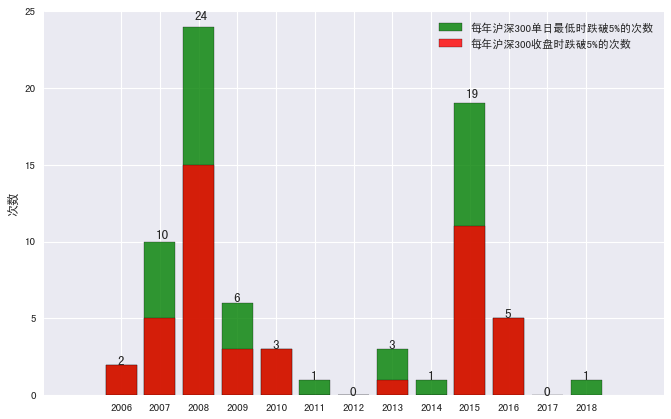

In [182]:
## 定义一下中文乱码问题
plt.rcParams['font.sans-serif'] = 'simhei'
## 定义一下画图的风格
plt.style.use('seaborn-pastel')
## 定义一下画图的大小
f , ax=plt.subplots(figsize=(10,6))
## 第一个图形
rect = plt.bar(fig_x1, y1, align = 'center',color='g', alpha = 0.8,label ='每年沪深300单日最低时跌破5%的次数')
## 第二个图形
plt.bar(fig_x2, y2, align = 'center',color='r', alpha = 0.8,label ='每年沪深300收盘时跌破5%的次数')
## 标注一下数字
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    plt.text(x+0.3,1.02*height,str(height))
## Y的标签
plt.ylabel("次数")
## X轴的显示问题
plt.xticks(fig_x1)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format)) ##定义年份格式
## legend的位置
plt.legend(loc=1)